In [ ]:

import cv2,os

data_path='/content/dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without mask': 0, 'with mask': 1}
['without mask', 'with mask']
[0, 1]


In [ ]:
!unzip /content/drive/MyDrive/facemaskdetection.zip

Archive:  /content/drive/MyDrive/facemaskdetection.zip
  inflating: dataset/with mask/65-with-mask.jpg  
  inflating: dataset/with mask/81-with-mask.jpg  
  inflating: dataset/with mask/51-with-mask.jpg  
  inflating: dataset/with mask/453-with-mask.jpg  
  inflating: dataset/with mask/14-with-mask.jpg  
  inflating: dataset/with mask/143-with-mask.jpg  
  inflating: dataset/with mask/augmented_image_151.jpg  
  inflating: dataset/with mask/augmented_image_122.jpg  
  inflating: dataset/with mask/471-with-mask.jpg  
  inflating: dataset/with mask/138-with-mask.jpg  
  inflating: dataset/with mask/augmented_image_65.jpg  
  inflating: dataset/with mask/217-with-mask.jpg  
  inflating: dataset/with mask/297-with-mask.jpg  
  inflating: dataset/with mask/376-with-mask.jpg  
  inflating: dataset/with mask/73-with-mask.jpg  
  inflating: dataset/with mask/augmented_image_33.jpg  
  inflating: dataset/without mask/augmented_image_138.jpg  
  inflating: dataset/with mask/augmented_image_169.j

In [ ]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:

import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [ ]:

np.save('datum',data)
np.save('targetum',new_target)

In [ ]:
import numpy as np

data=np.load('/content/datum.npy')
target=np.load('/content/targetum.npy')

#loading the save numpy arrays in the previous code

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 69s 2s/step - loss: 0.7172 - accuracy: 0.5020 - val_loss: 0.6302 - val_accuracy: 0.7298
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/20
31/31 [==============================] - 70s 2s/step - loss: 0.6122 - accuracy: 0.6658 - val_loss: 0.4413 - val_accuracy: 0.8468
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/20
31/31 [==============================] - 67s 2s/step - loss: 0.5058 - accuracy: 0.7671 - val_loss: 0.4355 - val_accuracy: 0.8226
INFO:tensorflow:Assets written to: model-003.model/assets
Epoch 4/20
31/31 [==============================] - 66s 2s/step - loss: 0.3981 - accuracy: 0.8329 - val_loss: 0.2458 - val_accuracy: 0.9113
INFO:tensorflow:Assets written to: model-004.model/assets
Epoch 5/20
31/31 [==============================] - 67s 2s/step - loss: 0.2594 - accuracy: 0.8896 - val_loss: 0.2207 - val_accuracy: 0.9315
INFO:tensorflow:Assets written to: model-005.model/assets
Epoch 6/20

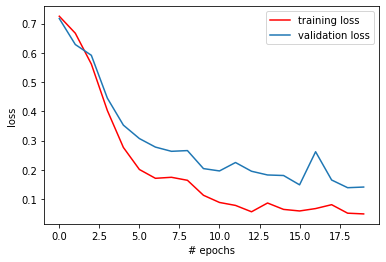

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

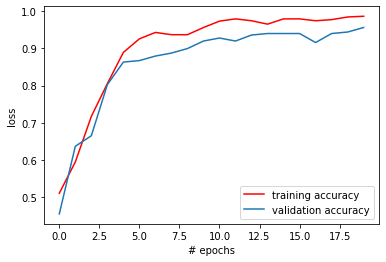

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 0s 72ms/step - loss: 0.2526 - accuracy: 0.9420
[0.2525712847709656, 0.9420289993286133]
